In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('irisBinary.csv')

# Map class labels to binary values
data['Iris Class'] = data['Iris Class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1})

# Split dataset into features and labels
X = data[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']].values
y = data['Iris Class'].values.reshape(-1, 1)

# Standardize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split the data into training (60 samples), validation (20 samples), and testing (20 samples)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=60, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=20, stratify=y_temp, random_state=42)

# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Set hyperparameters
input_neurons = X.shape[1]
output_neurons = 1
epochs = 200

# Initialize weights and biases
np.random.seed(42)
initial_weights = np.random.uniform(size=(input_neurons, output_neurons))
initial_bias = np.random.uniform(size=(1, output_neurons))

def reinitialize_parameters():
    global weights, bias
    weights = np.copy(initial_weights)
    bias = np.copy(initial_bias)

# Forward propagation
def forward_propagation(X):
    output_layer_input = np.dot(X, weights) + bias
    output = sigmoid(output_layer_input)
    return output

# Training the perceptron
def train(X_train, y_train, X_val, y_val, epochs, learning_rate):
    
    global weights, bias
    train_loss_history = []
    val_loss_history = []
   

    for epoch in range(epochs):
        # Forward pass for training
        output_train = forward_propagation(X_train)
        
        # Calculate error for training
        error_train = y_train - output_train
        
        # Calculate delta (gradient) for output layer
        delta_train = error_train * sigmoid_derivative(output_train)
        
        # Update weights and bias
        weights += np.dot(X_train.T, delta_train) * learning_rate
        bias += np.sum(delta_train, axis=0, keepdims=True) * learning_rate
        
        # Record training loss
        train_loss = np.mean(np.square(error_train))
        train_loss_history.append(train_loss)
        
        # Forward pass for validation
        output_val = forward_propagation(X_val)
        
        # Calculate error for validation
        error_val = y_val - output_val
        
        val_loss = np.mean(np.square(error_val))
        val_loss_history.append(val_loss)
        
    
    return train_loss_history, val_loss_history

# Predict function
def predict(X):
    output = forward_propagation(X)
    return output

# Learning rates to try
learning_rates = [0.01, 0.05, 1]

# Store loss histories for each learning rate
loss_histories = {}

for lr in learning_rates:
    reinitialize_parameters()
 
    print(f"Training with learning rate: {lr}")
    train_loss_history, val_loss_history = train(X_train, y_train, X_val, y_val, epochs, lr)
    loss_histories[lr] = val_loss_history

    predictions = predict(X_test)
    binary_predictions = [1 if p >= 0.5 else 0 for p in predictions]
    accuracy = np.mean(binary_predictions == y_test.flatten()) * 100
    print(f'Accuracy: {accuracy}%')

Training with learning rate: 0.01
Accuracy: 100.0%
Training with learning rate: 0.05
Accuracy: 100.0%
Training with learning rate: 1
Accuracy: 100.0%


200
Minimum loss
0.006534749735166483


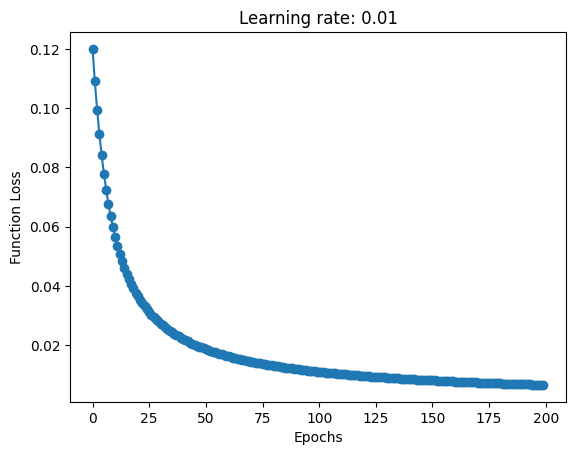

Minimum loss
0.002094949589540001


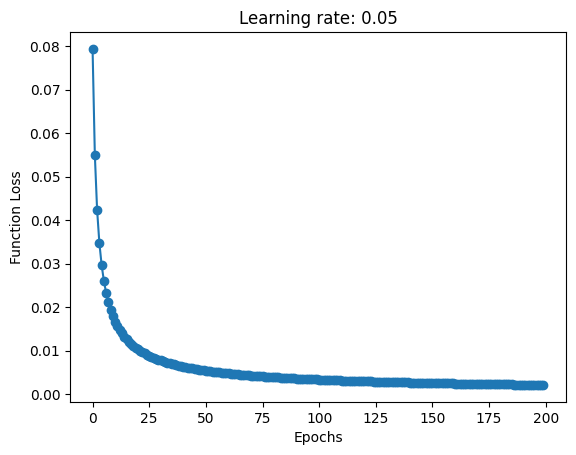

Minimum loss
3.9553116167370166e-07


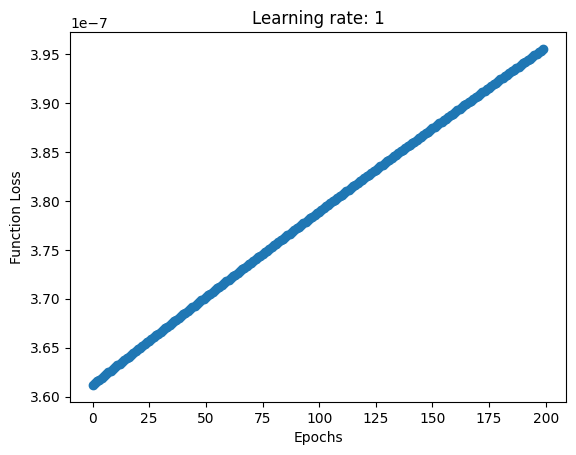

In [44]:
print(len(loss_histories[0.01]))

for loss in loss_histories:

    print("Minimum loss")
    print(loss_histories[loss][-1])


    title = str(loss)
    plt.plot(loss_histories[loss], marker='o')

    # Adding title and labels
    plt.title('Learning rate: {}'.format(title))
    plt.xlabel('Epochs')
    plt.ylabel('Function Loss')     
    #plt.axis([0, epochs,0,loss_histories[loss][0]])
    #plt.ticklabel_format(style='plain', axis='y')

    #plt.yscale('log')
    #plt.ticklabel_format(style='plain', axis='y',useOffset=False)
    # Display the graph
    plt.show()

In [45]:
#Due to very low values in training loss for learning rate 1, the results are in scientific notation.

In [46]:
best_lr = 1
reinitialize_parameters()
train(X_train, y_train, X_val, y_val, epochs, best_lr)
predictions = predict(X_test)
binary_predictions = [1 if p >= 0.5 else 0 for p in predictions]
accuracy = np.mean(binary_predictions == y_test.flatten()) * 100
print(f'Accuracy with learning rate {best_lr}: {accuracy}%')

Accuracy with learning rate 1: 100.0%
